# GAN Trained on MNIST

## Imports

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

#### Import utility functions

In [2]:
from helper_data import get_dataloaders_mnist
from helper_train import train_gan_v1
from helper_utils import set_deterministic, set_all_seeds
from helper_plotting import plot_multiple_training_losses
from helper_plotting import plot_generated_images

In [3]:
##########################
### SETTINGS
##########################

# Device
#CUDA_DEVICE_NUM = 3
#DEVICE = torch.device(f'cuda:{CUDA_DEVICE_NUM}' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')
print('Device:', DEVICE)

# Hyperparameters
RANDOM_SEED = 42
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

NUM_EPOCHS = 20
BATCH_SIZE = 128

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 28, 28, 1

Device: cpu


In [4]:
set_deterministic
set_all_seeds(RANDOM_SEED)

## Dataset

In [5]:
##########################
### Dataset
##########################

from torchvision import datasets
from torch.utils.data import DataLoader


custom_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])


train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=custom_transforms,
                               download=True)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE,
                          num_workers=0,
                          shuffle=True)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [6]:
# Checking the dataset
print('Training Set:\n')
for images, labels in train_loader:  
    print('Image batch dimensions:', images.size())
    print('Image label dimensions:', labels.size())
    #print(labels[:10])
    break

Training Set:

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


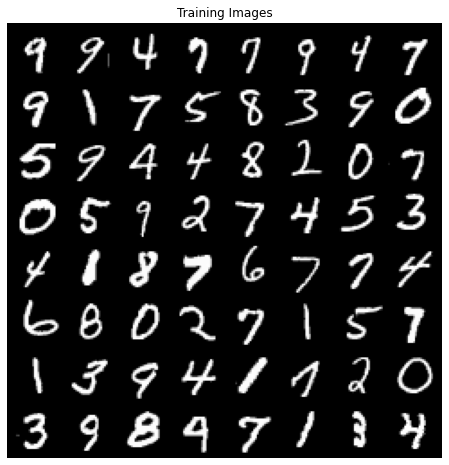

In [7]:
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:64], 
                                         padding=2, normalize=True),
                        (1, 2, 0)))
plt.show()

## Model

In [8]:
##########################
### MODEL
##########################

class GAN(torch.nn.Module):

    def __init__(self, latent_dim=100, 
                 image_height=28, image_width=28, color_channels=1):
        super().__init__()
        
        self.image_height = image_height
        self.image_width = image_width
        self.color_channels = color_channels
        
        self.generator = nn.Sequential(
            # nn.Linear(latent_dim, 128),
            # Reshape(-1, 100, 128, 128),


            # nn.ConvTranspose2d(latent_dim, 64, stride=1, kernel_size=9, padding=1),
            # nn.LeakyReLU(inplace=True),
            # nn.ConvTranspose2d(64, 128, stride=1, kernel_size=10, padding=1),
            # nn.LeakyReLU(inplace=True),
            # nn.ConvTranspose2d(128, 64, stride=1, kernel_size=10, padding=1),
            # nn.LeakyReLU(inplace=True),
            # nn.ConvTranspose2d(64, 1, stride=1, kernel_size=10, padding=1),
            # nn.LeakyReLU(inplace=True),
            # Trim()

            nn.ConvTranspose2d(latent_dim, 50, stride=1, kernel_size=16, padding=1),
            nn.LeakyReLU(inplace=True),
            nn.ConvTranspose2d(50, 1, stride=1, kernel_size=17, padding=1),
            nn.LeakyReLU(inplace=True),



            # nn.ConvTranspose2d(64, 1, stride=2, kernel_size=3, padding=1),
            # nn.LeakyReLU(inplace=True),
            # nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1),
            # nn.LeakyReLU(inplace=True), 
            # nn.ConvTranspose2d(32, 3, stride=2, kernel_size=3, padding=1),
            # Trim(),
            # nn.Dropout(p=0.5),
            # nn.Linear(128, image_height*image_width*color_channels),
            nn.Tanh()
        )
        
        self.discriminator = nn.Sequential(
            # nn.Flatten(),
            # # nn.Linear(image_height*image_width*color_channels, 128),
            # nn.Conv2d(1, 64, stride=1, kernel_size=5, padding=0, bias=True),
            # nn.LeakyReLU(inplace=True),
            # #33
            # nn.Conv2d(64, 128, stride=4, kernel_size=1, padding=0, bias=True),
            # nn.LeakyReLU(inplace=True),
            # #9
            # nn.Conv2d(128, 128, stride=4, kernel_size=1, padding=0, bias=True),
            # nn.LeakyReLU(inplace=True),
            # #3
            # nn.Conv2d(128, 64, stride=2, kernel_size=1, padding=0, bias=True),
            # nn.LeakyReLU(inplace=True),
            # #2
            # nn.Conv2d(64, 1, stride=2, kernel_size=1, padding=0, bias=True),
            # nn.LeakyReLU(inplace=True),
            #1
            nn.Conv2d(1, 50, stride=4, kernel_size=5, padding=0, bias=False),
            nn.LeakyReLU(inplace=True),
            #33
            nn.Conv2d(50, 1, stride=4, kernel_size=5, padding=0, bias=False),
            nn.LeakyReLU(inplace=True),

            # 
            # nn.Dropout(p=0.5),
            # nn.Linear(128, 1), # outputs logits
            # nn.Sigmoid()
        )
    
    def generator_forward(self, z):# z has dimension NCHW
        # print(z.shape)
        # # z = torch.flatten(z, start_dim=1) 
        # print(len(z))
        img = self.generator(z)
        # print(img.shape)
        img = img.view(z.size(0),
                       self.color_channels,
                       self.image_height,
                       self.image_width)
        
        return img
    def discriminator_forward(self, img):
        logits = model.discriminator(img)
        # print(logits.shape)
        # print(img.shape)
        return logits
# class Trim(nn.Module):
#   def __init__(self, *args):
#       super().__init__()

#   def forward(self, x):
#       return x[:, :, :128, :128]
# class Reshape(nn.Module):
#     def __init__(self, *args):
#         super().__init__()
#         self.shape = args

#     def forward(self, x):
#         return x.view(self.shape)

In [9]:
set_all_seeds(RANDOM_SEED)

model = GAN()
model.to(DEVICE)


optim_gen = torch.optim.Adam(model.generator.parameters(),
                             betas=(0.5, 0.999),
                             lr=GENERATOR_LEARNING_RATE)

optim_discr = torch.optim.Adam(model.discriminator.parameters(),
                               betas=(0.5, 0.999),
                               lr=DISCRIMINATOR_LEARNING_RATE)

## Training

In [10]:
log_dict = train_gan_v1(num_epochs=NUM_EPOCHS, model=model, 
                        optimizer_gen=optim_gen,
                        optimizer_discr=optim_discr,
                        latent_dim=100,
                        device=DEVICE, 
                        train_loader=train_loader,
                        logging_interval=100,
                        save_model='gan_mnist_01.pt')

Epoch: 001/020 | Batch 000/469 | Gen/Dis Loss: 0.6924/0.6641
Epoch: 001/020 | Batch 100/469 | Gen/Dis Loss: 0.6764/0.3702
Epoch: 001/020 | Batch 200/469 | Gen/Dis Loss: 0.6295/0.3969
Epoch: 001/020 | Batch 300/469 | Gen/Dis Loss: 0.6672/0.3736
Epoch: 001/020 | Batch 400/469 | Gen/Dis Loss: 0.6345/0.3970
Time elapsed: 2.35 min
Epoch: 002/020 | Batch 000/469 | Gen/Dis Loss: 0.6163/0.4151
Epoch: 002/020 | Batch 100/469 | Gen/Dis Loss: 0.6034/0.4295
Epoch: 002/020 | Batch 200/469 | Gen/Dis Loss: 0.6237/0.4211
Epoch: 002/020 | Batch 300/469 | Gen/Dis Loss: 0.6079/0.4340
Epoch: 002/020 | Batch 400/469 | Gen/Dis Loss: 0.6084/0.4411
Time elapsed: 4.59 min
Epoch: 003/020 | Batch 000/469 | Gen/Dis Loss: 0.5955/0.4522
Epoch: 003/020 | Batch 100/469 | Gen/Dis Loss: 0.5886/0.4608
Epoch: 003/020 | Batch 200/469 | Gen/Dis Loss: 0.5840/0.4720
Epoch: 003/020 | Batch 300/469 | Gen/Dis Loss: 0.5809/0.4803
Epoch: 003/020 | Batch 400/469 | Gen/Dis Loss: 0.5915/0.4690
Time elapsed: 6.81 min
Epoch: 004/020 |

## Evaluation

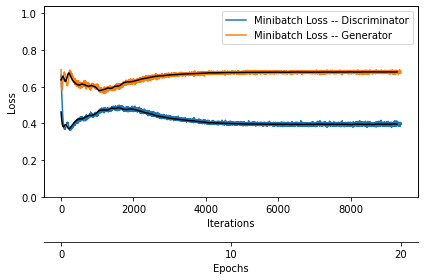

In [11]:
plot_multiple_training_losses(
    losses_list=(log_dict['train_discriminator_loss_per_batch'],
                 log_dict['train_generator_loss_per_batch']),
    num_epochs=NUM_EPOCHS, 
    custom_labels_list=(' -- Discriminator', ' -- Generator')
)

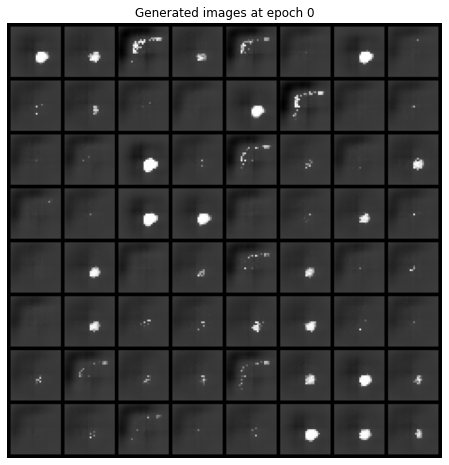

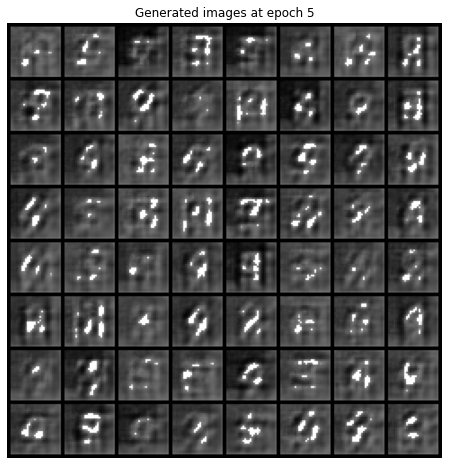

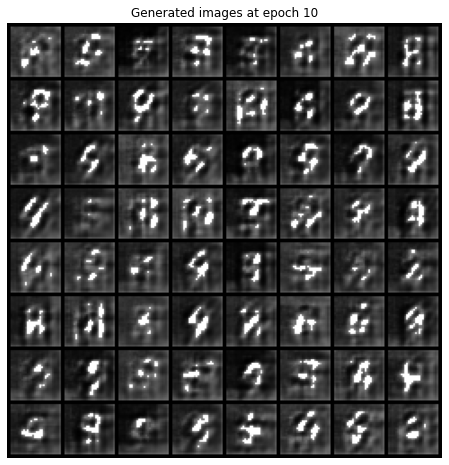

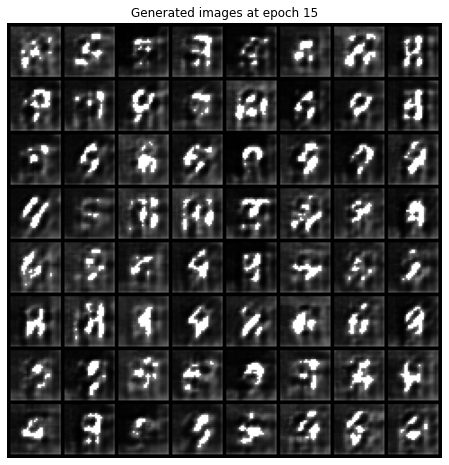

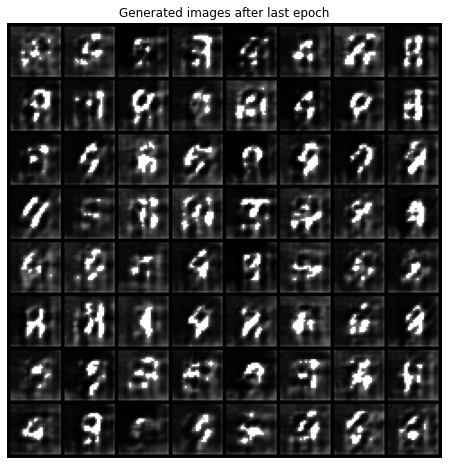

In [12]:
##########################
### VISUALIZATION
##########################

for i in range(0, NUM_EPOCHS, 5):
    
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.title(f'Generated images at epoch {i}')
    plt.imshow(np.transpose(log_dict['images_from_noise_per_epoch'][i], (1, 2, 0)))
    plt.show()
    
    
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title(f'Generated images after last epoch')
plt.imshow(np.transpose(log_dict['images_from_noise_per_epoch'][-1], (1, 2, 0)))
plt.show()